# ConvNN with CIFAR10 dataset

## Install required libraries

In [1]:
!pip install --upgrade tensorflow matplotlib tensorflow_datasets

     |████████████████████▊           | 297.5 MB 121.0 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 458.3 MB 13 kB/s /s eta 0:00:01
     |████████████████████████████████| 11.5 MB 78.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 89.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 85.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 63.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 9.6 MB/s  eta 0:00:01
     |████████████████████████████████| 14.8 MB 86.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.5 MB/s  eta 0:00:01
     |████████████████████████████████| 5.6 MB 87.1 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.0 MB/s  eta 0:00:01
     |████████████████████████████████| 462 kB 77.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 79.3 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 90.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 86.8 MB/s eta 0:00:01
     |██████████████████████████

## Import required libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
import tensorflow_datasets as tfds

## Show the tf and tfds version

In [3]:
tf.__version__

'2.6.2'

In [4]:
tfds.__version__

'4.5.2'

## Load the dataset

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape, X_test.shape, X_train.shape[1:],X_train.dtype

((50000, 32, 32, 3), (10000, 32, 32, 3), (32, 32, 3), dtype('uint8'))

## Function to construct NN model

In [6]:
def create_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False),
                loss=tf.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

    return model

## Create a basic model instance

In [7]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 96)        2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 384)       332160    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 384)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 384)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 384)         1

## Train the data

In [8]:
tic = time.perf_counter()
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test,y_test))
toc = time.perf_counter()
print(f"Trained the dataset in {toc - tic:0.1f} seconds")

Epoch 1/10
1563/1563 [==============================] - 678s 434ms/step - loss: 1.5351 - sparse_categorical_accuracy: 0.4445 - val_loss: 1.3821 - val_sparse_categorical_accuracy: 0.5069
Epoch 2/10
1563/1563 [==============================] - 675s 432ms/step - loss: 1.1470 - sparse_categorical_accuracy: 0.5951 - val_loss: 1.4718 - val_sparse_categorical_accuracy: 0.4935
Epoch 3/10
1563/1563 [==============================] - 652s 417ms/step - loss: 0.9897 - sparse_categorical_accuracy: 0.6535 - val_loss: 1.1997 - val_sparse_categorical_accuracy: 0.5758
Epoch 4/10
1563/1563 [==============================] - 632s 404ms/step - loss: 0.8760 - sparse_categorical_accuracy: 0.6974 - val_loss: 0.8851 - val_sparse_categorical_accuracy: 0.6974
Epoch 5/10
1563/1563 [==============================] - 672s 430ms/step - loss: 0.7788 - sparse_categorical_accuracy: 0.7305 - val_loss: 0.8949 - val_sparse_categorical_accuracy: 0.6953
Epoch 6/10
1563/1563 [==============================] - 672s 430ms/ste

## Plot the training results

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


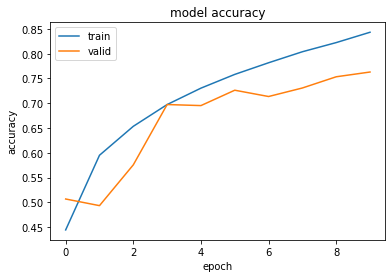

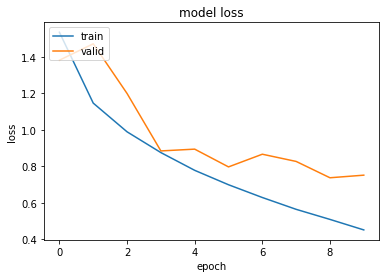

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [11]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 34s - loss: 0.7523 - sparse_categorical_accuracy: 0.7630


[0.7522589564323425, 0.7630000114440918]